<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [104]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 163.0 MB/s eta 0:00:0000:01


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [139]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [106]:
## Write your code here
print(df.dtypes)
print('')
print(len(df))


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

65437


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [107]:
## Write your code here

#Checking missing value of the important column of a data set
missing_values = df[['JobSat', 'RemoteWork', 'ConvertedCompYearly','YearsCodePro']].isna().sum()
print('Missing values of the dataset: ')
print(missing_values)
print('========================')

#Dropping missing values of a Column that has a great number of missing value
df_clean = df.dropna(subset=['JobSat', 'RemoteWork', 'ConvertedCompYearly'])

#Imputing YearsCodePro column
most_frequent_value = df_clean['YearsCodePro'].mode()[0]
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].fillna(most_frequent_value)

#Validation after removal of missing values and imputation
print('Missing values after removing NAN: ')
print(df_clean[['JobSat', 'RemoteWork', 'ConvertedCompYearly','YearsCodePro']].isna().sum())

Missing values of the dataset: 
JobSat                 36311
RemoteWork             10631
ConvertedCompYearly    42002
YearsCodePro           13827
dtype: int64
Missing values after removing NAN: 
JobSat                 0
RemoteWork             0
ConvertedCompYearly    0
YearsCodePro           0
dtype: int64


/tmp/ipykernel_299/1661162893.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = df_clean['YearsCodePro'].fillna(most_frequent_value)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [152]:
## Write your code here


employment_list = df_clean['Employment'].str.split(';').explode()
employment_counts = employment_list.value_counts()
print('Number of employments: ')
print(employment_counts)
print('============================')

jobsat_counts = df_clean['JobSat'].astype(int).value_counts().sort_values(ascending=False)
print('Number of Job Satisfaction: ')
print(jobsat_counts)
print('============================')

yearscode_counts = df_clean['YearsCodePro'].value_counts()
print('Number of YearsCodePro: ')
print(yearscode_counts)
print('============================')

Number of employments: 
Employment
Employed, full-time                                     14602
Independent contractor, freelancer, or self-employed     2301
Employed, part-time                                       932
Student, part-time                                        522
Student, full-time                                        488
Not employed, but looking for work                         62
Retired                                                     7
Not employed, and not looking for work                      7
Name: count, dtype: int64
Number of Job Satisfaction: 
JobSat
8     4150
7     3504
6     2058
9     2017
10    1206
5     1016
4      670
3      660
2      458
0      172
1      159
Name: count, dtype: int64
Number of YearsCodePro: 
YearsCodePro
3.0     1400
5.0     1215
2.0     1213
4.0     1101
10.0    1063
6.0     1046
8.0      919
7.0      887
12.0     618
1.0      611
9.0      556
15.0     510
11.0     486
20.0     421
13.0     415
0.5      386
14.0     358
1

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


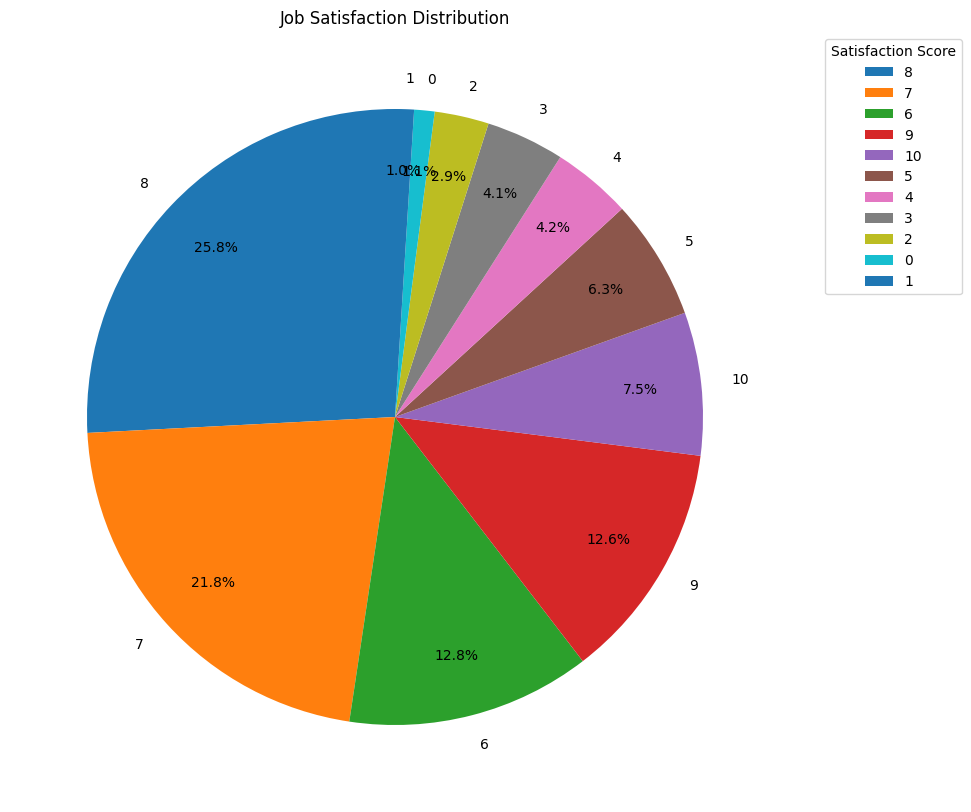

In [109]:
## Write your code here
plt.figure(figsize= (12,10))
plt.pie(
    jobsat_counts,
    labels=jobsat_counts.index,
    autopct='%1.1f%%',
    pctdistance=0.8, startangle=90
)

plt.legend(jobsat_counts.index,
           title="Satisfaction Score",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.title('Job Satisfaction Distribution')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


                         Have work with  Want to work with
JavaScript                        10235               6473
SQL                                9031               6705
HTML/CSS                           8501               5697
Python                             7895               6647
TypeScript                         7121               6190
Bash/Shell (all shells)            6123               4089
C#                                 4731               3840
Java                               4709               2789
C++                                2996               2382
PHP                                2830               1428


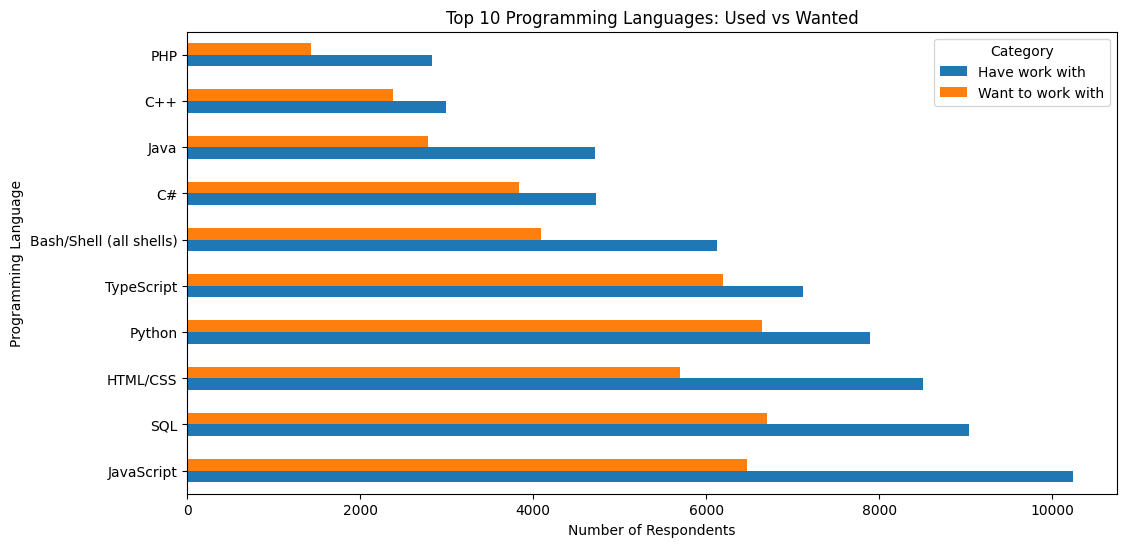

In [110]:
## Write your code here
# Select relevant columns and drop missing values
df_clean_lang = df_clean[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna()

#Split multiple languages into individual rows
have_lang = df_clean['LanguageHaveWorkedWith'].str.split(';').explode()
want_lang = df_clean['LanguageWantToWorkWith'].str.split(';').explode()

#Count frequencies
have_counts = have_lang.value_counts()
want_counts = want_lang.value_counts()

#Combine counts into one table
language_compare = pd.DataFrame({
    'Have work with': have_counts,
    'Want to work with': want_counts
}).fillna(0).astype(int)

#Select top languages (to keep visualization readable)
language_compare_sorted = language_compare.sort_values(
    by='Have work with',
    ascending=False
)

#Sort & select Top 10 (by “Have worked with”)
language_compare_top = language_compare_sorted.head(10)
print(language_compare_top)

#Grouped bar chart (best visualization)
language_compare_top[['Have work with', 'Want to work with']].plot(
    kind='barh',
    figsize=(12, 6)
)
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.legend(title='Category')
plt.title('Top 10 Programming Languages: Used vs Wanted')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


/tmp/ipykernel_299/3251167204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = df_clean['Country'].replace(


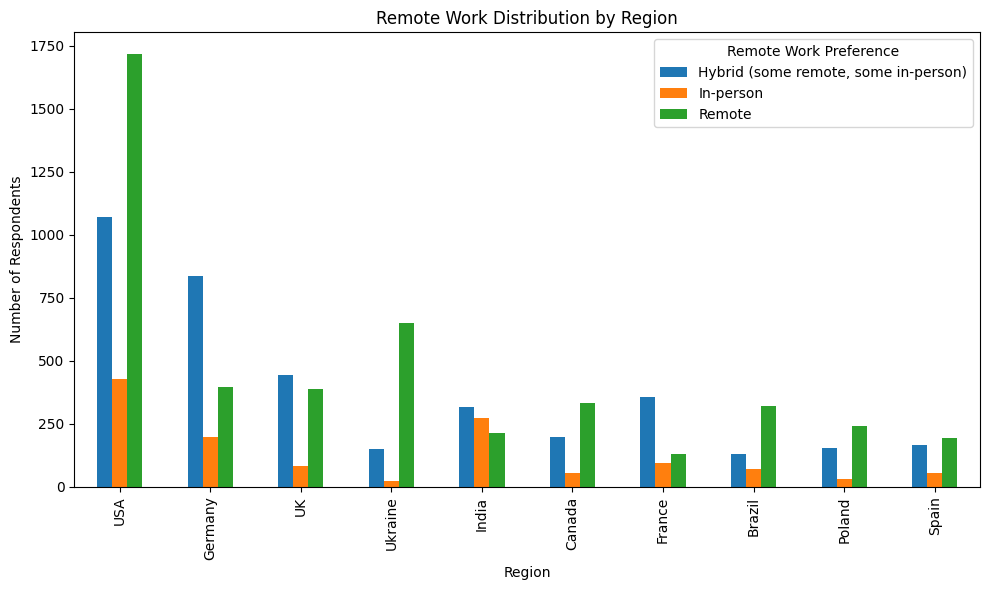

In [111]:
## Write your code here

#Abbreviate some Country
df_clean['Country'] = df_clean['Country'].replace(
    {'United Kingdom of Great Britain and Northern Ireland': 'UK',
     'United States of America': 'USA'}
)

#Count frequencies
country_counts = df_clean['Country'].value_counts().sort_values(ascending = False)
top10_country = country_counts.head(10).index

#Cross-tabulate RemoteWork by region
remote_by_region = pd.crosstab(df_clean['Country'], df['RemoteWork']).loc[top10_country]

#Grouped bar chart (easy to interpret)
remote_by_region.plot(
    kind='bar',
    figsize=(10, 6)
)
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.title('Remote Work Distribution by Region')
plt.legend(title='Remote Work Preference')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [126]:
## Write your code here


# Inspect the relevant columns
# 1) Inspect problematic values
print('Datatype of YearsCodePro: ', df_clean['YearsCodePro'].dtype)
print('Datatype of Job Satisfaction:', df_clean['JobSat'].dtype)
print(df_clean[['JobSat', 'YearsCodePro']].head(10))

#Replace verbal ranges, then coerce to numeric safely
df_clean.loc[:, 'YearsCodePro'] = df_clean['YearsCodePro'].replace(
    {'Less than 1 year': 0.5, 'More than 50 years': 50}
)
df_clean.loc[:, 'YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')


print('========================================')
# Option 1: Pearson correlation (assumes linear relationship)
pearson_corr, pearson_p = stats.pearsonr(df_clean['JobSat'], df_clean['YearsCodePro'])
print("Pearson:", pearson_corr, "p=", pearson_p)

# Option 2: Spearman correlation (non-parametric, monotonic relationship)
spearman_corr, spearman_p = stats.spearmanr(df_clean['JobSat'], df_clean['YearsCodePro'])
print("Spearman:", spearman_corr, "p=", spearman_p)


Datatype of YearsCodePro:  float64
Datatype of YearsCodePro: float64
     JobSat  YearsCodePro
72     10.0           1.0
379    10.0           6.0
389    10.0           7.0
392     7.0          18.0
398     5.0          30.0
415     3.0          16.0
416     8.0          17.0
417    10.0           1.0
423     7.0           4.0
424     7.0          30.0
Pearson: 0.10313227612657001 p= 2.97218978456737e-39
Spearman: 0.11792167347217643 p= 7.360557433087951e-51


/tmp/ipykernel_299/774350785.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Top employment tokens:
 Employment_tokens
Employed                    15534
full-time                   15090
Independent contractor       2301
or self-employed             2301
freelancer                   2301
part-time                    1454
Student                      1010
Not employed                   69
but looking for work           62
Retired                         7
and not looking for work        7
Name: count, dtype: int64
Crosstab shape: (4, 8)


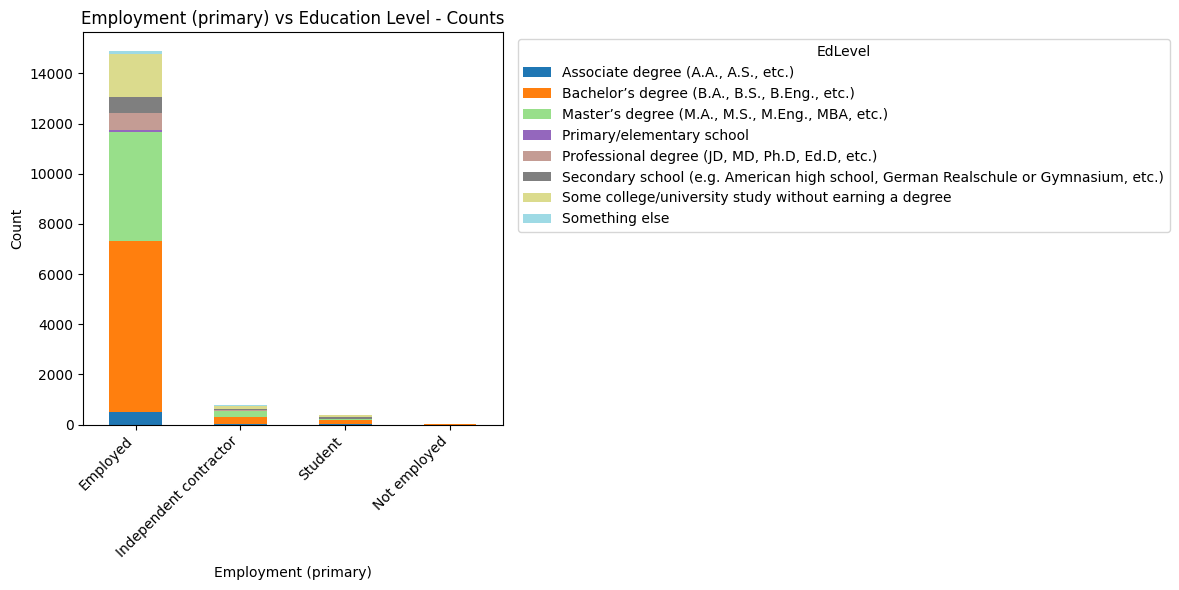

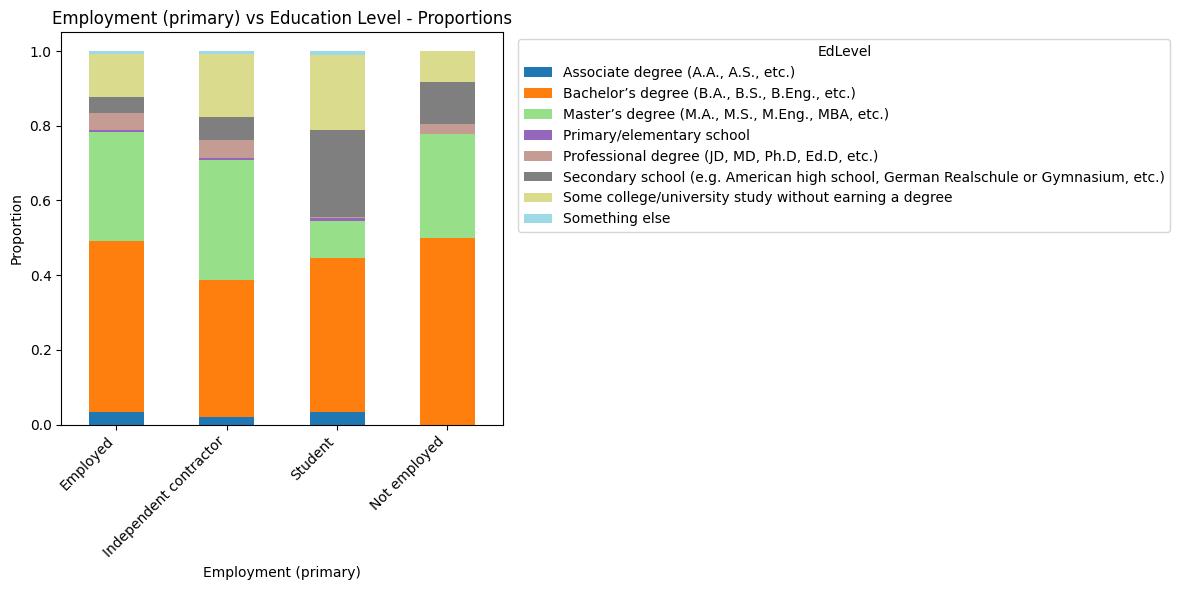

In [151]:
## Write your code here


# 1) Normalize Employment: split on common delimiters and pick the first token as primary
def split_tokens(s):
    if pd.isna(s):
        return []
    parts = re.split(r'[;/,|\\\\]+', str(s))   # split on ; , / | or backslash
    parts = [p.strip() for p in parts if p.strip()]
    return parts

#Runs the function split_tokens on every cell in the Employment column and stores the result in a new column
df_clean['Employment_tokens'] = df_clean['Employment'].apply(split_tokens)
df_clean['Employment_primary'] = df_clean['Employment_tokens'].apply(lambda t: t[0] if t else pd.NA)

# 2) (Optional) count all token occurrences across rows
exploded = df_clean.explode('Employment_tokens')
token_counts = exploded['Employment_tokens'].value_counts(dropna=True)
print("Top employment tokens:\n", token_counts.head(20))

# 3) Crosstab using the primary employment value vs EdLevel
ct = pd.crosstab(df_clean['Employment_primary'], df_clean['EdLevel'])
ct = ct.sort_values(ct.columns.tolist(), ascending=False)  # optional sort
print("Crosstab shape:", ct.shape)

# 4) Plot raw counts (stacked bar)
ax = ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
ax.set_xlabel('Employment (primary)')
ax.set_ylabel('Count')
ax.set_title('Employment (primary) vs Education Level - Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EdLevel', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5) Plot normalized proportions (rows sum to 1)
ct_norm = ct.div(ct.sum(axis=1), axis=0).fillna(0)
ax = ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
ax.set_xlabel('Employment (primary)')
ax.set_ylabel('Proportion')
ax.set_title('Employment (primary) vs Education Level - Proportions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EdLevel', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [143]:
## Write your code here
df_clean.to_csv("survey-data-cleaned.csv", index=False, encoding="utf-8")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
